In [1]:
import matplotlib.pyplot as plt; 
import numpy as np; import pylab; 
import os; 
import pandas as pd
import plotly.plotly as py;
import plotly.tools as tls
from statsmodels import robust
import seaborn as sns; # Seaborn box plot for statistical annotation - * pvalue

In [2]:
# Read in data
def parse_data_CDC(file,cancer_type, metric_index):
    
    filename = os.path.join("Originals", file)
    
    data = []; cancer=[];metric=[];year=[];
    all_races=[]; caucasian=[];african_american=[];asian=[];hispanic=[];native_american=[];
    
    f = open(filename,'r')
    for line in f: data.append(line)
    f.close()   
    
    for i in range(len(data)):
        x1,x2,x3,x4,x5,x6,x7,x8,x9 = data[i].split(",")  
        
        if x1 == cancer_type:
            if x2 == metric_index:
                year.append(int(x3)) 
                all_races.append(int(x4))
                
                year_sum = int(x5)+int(x6)+int(x7)+int(x8)+int(x9)
                
                caucasian.append(int(x5)/year_sum)
                african_american.append(int(x6)/year_sum)
                asian.append(int(x7)/year_sum) 
                hispanic.append(int(x8)/year_sum) 
                native_american.append(int(x9)/year_sum) 
    
    return(year, caucasian, african_american, asian, hispanic, native_american)

In [3]:
def stacked_bar_CDC(year, caucasian, african_american, asian, hispanic, native_american, title):

    plt.bar(year,caucasian, color=[.9, .7, .7], width=1)

    bar_offset = []
    for i in range(len(native_american)):
        number = caucasian[i]
        bar_offset.append(number)

    plt.bar(year,african_american, color=[.7, .9, .7], width=1, bottom=bar_offset)

    bar_offset = []
    for i in range(len(native_american)):
        number = caucasian[i] + african_american[i]
        bar_offset.append(number)

    plt.bar(year, asian, color=[.7, .7, .9], width=1, bottom=bar_offset)

    bar_offset = []
    for i in range(len(native_american)):
        number = caucasian[i] + african_american[i] + asian[i]
        bar_offset.append(number)

    plt.bar(year, hispanic, color=[.9, .7, .9], width=1, bottom=bar_offset)

    bar_offset = []
    for i in range(len(native_american)):
        number = caucasian[i] + african_american[i] + asian[i] + hispanic[i]
        bar_offset.append(number)

    plt.bar(year, native_american, color=[.9, .9, .7], width=1, bottom=bar_offset)

    plt.title(title)
    plt.xlabel('Year'); 
    plt.ylabel('Volume Fraction'); 
    plt.ylim((.7,1.01))

    saved_filename = os.path.join("Figures", title + '.jpg')
    plt.savefig(saved_filename, bbox_inches='tight') 
    plt.show()

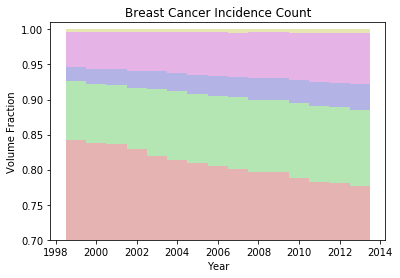

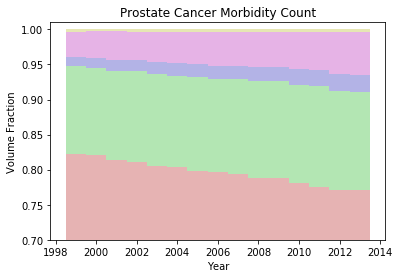

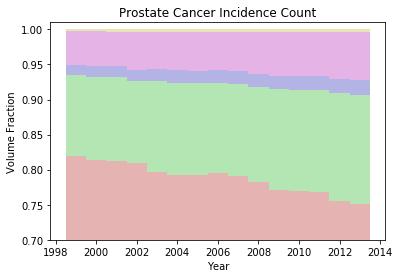

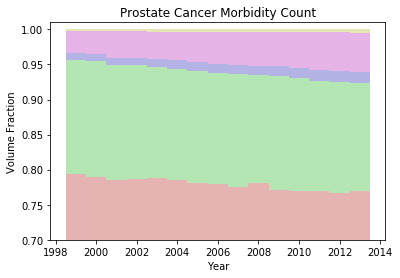

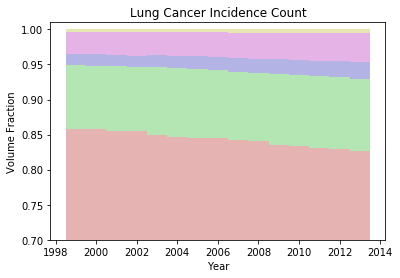

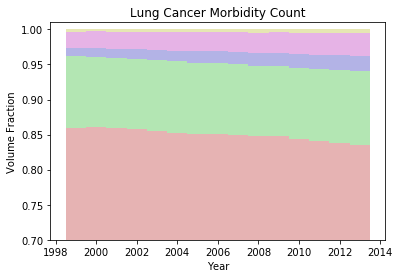

In [4]:
year=[]; caucasian=[]; african_american=[]; asian=[]; hispanic=[]; native_american=[];
year, caucasian, african_american, asian, hispanic, native_american = parse_data_CDC("v01_CDC.csv","2","3")
stacked_bar_CDC(year, caucasian, african_american, asian, hispanic, native_american, 'Breast Cancer Incidence Count')

year=[]; caucasian=[]; african_american=[]; asian=[]; hispanic=[]; native_american=[];
year, caucasian, african_american, asian, hispanic, native_american = parse_data_CDC("v01_CDC.csv","2","4")
stacked_bar_CDC(year, caucasian, african_american, asian, hispanic, native_american, 'Prostate Cancer Morbidity Count')

year=[]; caucasian=[]; african_american=[]; asian=[]; hispanic=[]; native_american=[];
year, caucasian, african_american, asian, hispanic, native_american = parse_data_CDC("v01_CDC.csv","3","3")
stacked_bar_CDC(year, caucasian, african_american, asian, hispanic, native_american, 'Prostate Cancer Incidence Count')

year=[]; caucasian=[]; african_american=[]; asian=[]; hispanic=[]; native_american=[];
year, caucasian, african_american, asian, hispanic, native_american = parse_data_CDC("v01_CDC.csv","3","4")
stacked_bar_CDC(year, caucasian, african_american, asian, hispanic, native_american, 'Prostate Cancer Morbidity Count')

year=[]; caucasian=[]; african_american=[]; asian=[]; hispanic=[]; native_american=[];
year, caucasian, african_american, asian, hispanic, native_american = parse_data_CDC("v01_CDC.csv","4","3")
stacked_bar_CDC(year, caucasian, african_american, asian, hispanic, native_american, 'Lung Cancer Incidence Count')

year=[]; caucasian=[]; african_american=[]; asian=[]; hispanic=[]; native_american=[];
year, caucasian, african_american, asian, hispanic, native_american = parse_data_CDC("v01_CDC.csv","4","4")
stacked_bar_CDC(year, caucasian, african_american, asian, hispanic, native_american, 'Lung Cancer Morbidity Count')   
    

In [5]:
def parse_data_count(file, gender, cancer_type, year_min, year_max):
    
    filename = os.path.join("Originals", file)
     
    data = []  
    caucasian = []; african_american = []; asian =[]; hispanic =[]; native_american = [];
    year_caucasian = []; year_african_american = []; year_asian = []; year_hispanic = []; year_native_american = [];
    
    f = open(filename,'r')
    for line in f: data.append(line)
    f.close()   
    
    for i in range(len(data)):
        x1,x2,x3,x4,x5 = data[i].split(",") 
        
        if x3 == cancer_type: 
        
            if x2 == "1":
                caucasian.append(int(x5))
                year_caucasian.append(int(x4))
        
            if x2 == "2":
                african_american.append(int(x5))
                year_african_american.append(int(x4))
            
            if x2 == "3":
                asian.append(int(x5))
                year_asian.append(int(x4))
             
            if x2 == "4":
                hispanic.append(int(x5))
                year_hispanic.append(int(x4)) 
                         
            if x2 == "5":
                native_american.append(int(x5))
                year_native_american.append(int(x4)) 
    
    print(caucasian)
    print(year_caucasian)

    return(caucasian, year_caucasian, african_american, year_african_american, asian, year_asian, \
           hispanic, year_hispanic, native_american, year_native_american)


In [6]:
caucasian, year_caucasian, african_american, year_african_american, asian, year_asian, \
hispanic, year_hispanic, native_american, year_native_american = parse_data_count("v01_PaCo.csv", "1", "2", 2002, 2007)

plt.bar(year_caucasian, caucasian, color=[.9, .7, .7], width=1)

bar_offset = []
for i in range(len(caucasian)):
    number = caucasian[i]
    bar_offset.append(number)
        
plt.bar(year_african_american, african_american, color=[.7, .9, .7], width=1, bottom=bar_offset)

del bar_offset[:]
for i in range(len(caucasian)):
    number = caucasian[i]+african_american[i]
    bar_offset.append(number)
    
plt.bar(year_asian, asian, color=[.7, .7, .9], width=1, bottom=bar_offset)

del bar_offset[:]
for i in range(len(caucasian)):
    number = caucasian[i]+african_american[i]+asian[i]
    bar_offset.append(number)

plt.bar(year_hispanic, hispanic, color=[.9, .7, .9], width=1, bottom=bar_offset)

bar offset =[]
for i in range(len(caucasian)):
    number = caucasian[i]+african_american[i]+asian[i]+hispanic[i]
    bar_offset.append(number)
    
plt.bar(year_native_american, native_american, color=[.9, .7, .9], width=1, bottom=bar_offset)
plt.show()


SyntaxError: invalid syntax (<ipython-input-6-230993a1b872>, line 19)